In [69]:
#расчет для ячейки 6,74 бора
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
start_time = datetime.now()
output = open('x.txt', 'w')
output = open('y.txt', 'w')
with open('C.scf.in') as f:
    lines = f.readlines()
for cut in np.arange(15, 100, 1):
    lines[14] = '      ecutwfc = {},'.format(cut)
    with open('input.in', 'w') as f:
        for l in lines:
                f.write(l)
    os.system('../bin/pw.x < input.in > output.txt')
    with open ('output.txt')as f:
        for l in f.readlines():
            if '!' in l:
                #print(cut, l[38:50])
                output = open('x.txt', 'a' )
                print(cut, file= output)
                output = open('y.txt', 'a')
                print(l[38:50], file= output )
                output.close()
# поменяем размер ячейки на 6.70
with open ('C.scf.in', 'r') as f:
    old_cell = f.read()
    new_cell = old_cell.replace('                   celldm(1) = 6.74,','                   celldm(1) = 6.70,')
with open ('C.scf.in', 'w') as f:
    f.write(new_cell)
#расчет для ячейки 6,70 бора
output = open('x670.txt', 'w') #созданим еще одну пару файлов для удобства расчета
output = open('y670.txt', 'w')
with open('C.scf.in') as f:
    lines = f.readlines()
for cut in np.arange(15, 100, 1):
    lines[14] = '      ecutwfc = {},'.format(cut)
    with open('input.in', 'w') as f:
        for l in lines:
                f.write(l)
    os.system('../bin/pw.x < input.in > output.txt')
    with open ('output.txt')as f:
        for l in f.readlines():
            if '!' in l:
                #print(cut, l[38:50])
                output = open('x670.txt', 'a' )
                print(cut, file= output)
                output = open('y670.txt', 'a')
                print(l[38:50], file= output )
                output.close()

time.sleep(1)
print('JOB DONE', datetime.now() - start_time)
#поменяем размер ячейки на 6.74
with open ('C.scf.in', 'r') as f:
    old_cell = f.read()
    new_cell = old_cell.replace('                   celldm(1) = 6.70,','                   celldm(1) = 6.74,')
with open ('C.scf.in', 'w') as f:
    f.write(new_cell)
    output.close()

JOB DONE 0:01:44.556918


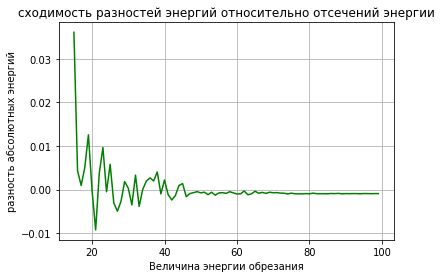

In [72]:
#сделаем массивы чисел из файлов найдем разность абсолютных энергий при параметрах ячейки 6,74 и 6,70
x = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')
x1 = np.loadtxt('x670.txt')
y1 = np.loadtxt('y670.txt')
y2 = y - y1
plt.title('сходимость разностей энергий относительно отсечений энергии')
plt.ylabel('разность абсолютных энергий')
plt.xlabel('Величина энергии обрезания')
plt.grid()
plt.plot(x, y2, 'g')
plt.savefig('result.jpg')


    Наблюдается сходимость при отсечении примерно в 43 Ryd, дальнейшее увеличение не имеет смысла

 &CONTROL
                 calculation = 'scf' ,
                restart_mode = 'from_scratch' ,
                      outdir = '/mnt/d/qe-6.5/task1/' ,
                  pseudo_dir = '/mnt/d/qe-6.5/task1/' ,
                      prefix = 'diamond' ,
                     tstress = .true. ,
                     tprnfor = .true. ,
 /
 &SYSTEM
                       ibrav = 2,
                   celldm(1) = 6.74,
                         nat = 2,
                        ntyp = 1,
                     ecutwfc = 40 ,
 /
 &ELECTRONS
                    conv_thr = 1.0d-8 ,
                 mixing_mode = 'plain' ,
                 mixing_beta = 0.7 ,
             diagonalization = 'david' ,
 /
ATOMIC_SPECIES
    C   12.01100  C.pz-vbc.UPF 
ATOMIC_POSITIONS 
    C      0.000000000    0.000000000    0.000000000    
    C      0.250000000    0.250000000    0.250000000    
K_POINTS {automatic}
   4 4 4   0 0 0

Program PWSCF v.6.5 starts on 20May2020 at  1:11:17 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Parallel version (MPI), running on     1 processors

     MPI processes distributed on     1 nodes
     Waiting for input...
     Reading input from standard input
     Message from routine read_cards :
     DEPRECATED: no units specified in ATOMIC_POSITIONS card
     Message from routine read_cards :
     ATOMIC_POSITIONS: units set to alat

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  3

     Subspace diagonalization in iterative solution of the eigenvalue problem:
     a serial algorithm will be used


     G-vector sticks info
     --------------------
     sticks:   dense  smooth     PW     G-vecs:    dense   smooth      PW
     Sum         595     595    187                 9841     9841    1687



     bravais-lattice index     =            2
     lattice parameter (alat)  =       6.7000  a.u.
     unit-cell volume          =      75.1908 (a.u.)^3
     number of atoms/cell      =            2
     number of atomic types    =            1
     number of electrons       =         8.00
     number of Kohn-Sham states=            4
     kinetic-energy cutoff     =      99.0000  Ry
     charge density cutoff     =     396.0000  Ry
     convergence threshold     =      1.0E-08
     mixing beta               =       0.7000
     number of iterations used =            8  plain     mixing
     Exchange-correlation=  SLA  PZ   NOGX NOGC
                           (   1   1   0   0   0   0   0)

     celldm(1)=   6.700000  celldm(2)=   0.000000  celldm(3)=   0.000000
     celldm(4)=   0.000000  celldm(5)=   0.000000  celldm(6)=   0.000000

     crystal axes: (cart. coord. in units of alat)
               a(1) = (  -0.500000   0.000000   0.500000 )  
               a(2) = (   0.000000   0.500000   0.500000 )  
               a(3) = (  -0.500000   0.500000   0.000000 )  

     reciprocal axes: (cart. coord. in units 2 pi/alat)
               b(1) = ( -1.000000 -1.000000  1.000000 )  
               b(2) = (  1.000000  1.000000  1.000000 )  
               b(3) = ( -1.000000  1.000000 -1.000000 )  


     PseudoPot. # 1 for C  read from file:
     /mnt/d/qe-6.5/task1/C.pz-vbc.UPF
     MD5 check sum: 902016046bf83189dffe9ec1c2a452ce
     Pseudo is Norm-conserving, Zval =  4.0
     Generated by new atomic code, or converted to UPF format
     Using radial grid of  269 points,  1 beta functions with: 
                l(1) =   0

     atomic species   valence    mass     pseudopotential
        C              4.00    12.01100     C ( 1.00)

     48 Sym. Ops., with inversion, found (24 have fractional translation)



   Cartesian axes

     site n.     atom                  positions (alat units)
         1           C   tau(   1) = (   0.0000000   0.0000000   0.0000000  )
         2           C   tau(   2) = (   0.2500000   0.2500000   0.2500000  )

     number of k points=     8
                       cart. coord. in units 2pi/alat
        k(    1) = (   0.0000000   0.0000000   0.0000000), wk =   0.0312500
        k(    2) = (  -0.2500000   0.2500000  -0.2500000), wk =   0.2500000
        k(    3) = (   0.5000000  -0.5000000   0.5000000), wk =   0.1250000
        k(    4) = (   0.0000000   0.5000000   0.0000000), wk =   0.1875000
        k(    5) = (   0.7500000  -0.2500000   0.7500000), wk =   0.7500000
        k(    6) = (   0.5000000   0.0000000   0.5000000), wk =   0.3750000
        k(    7) = (   0.0000000  -1.0000000   0.0000000), wk =   0.0937500
        k(    8) = (  -0.5000000  -1.0000000   0.0000000), wk =   0.1875000

     Dense  grid:     9841 G-vectors     FFT dimensions: (  32,  32,  32)

     Estimated max dynamical RAM per process >       7.71 MB

     Initial potential from superposition of free atoms

     starting charge    7.99994, renormalised to    8.00000
     Starting wfcs are    8 randomized atomic wfcs

     total cpu time spent up to now is        0.1 secs

     Self-consistent Calculation

     iteration #  1     ecut=    99.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  1.00E-02,  avg # of iterations =  2.0

     total cpu time spent up to now is        0.1 secs

     total energy              =     -22.77757380 Ry
     Harris-Foulkes estimate   =     -22.85179636 Ry
     estimated scf accuracy    <       0.14005910 Ry

     iteration #  2     ecut=    99.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  1.75E-03,  avg # of iterations =  2.0

     total cpu time spent up to now is        0.2 secs

     total energy              =     -22.79100578 Ry
     Harris-Foulkes estimate   =     -22.79149776 Ry
     estimated scf accuracy    <       0.00187971 Ry

     iteration #  3     ecut=    99.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  2.35E-05,  avg # of iterations =  2.0

     total cpu time spent up to now is        0.2 secs

     total energy              =     -22.79137133 Ry
     Harris-Foulkes estimate   =     -22.79138285 Ry
     estimated scf accuracy    <       0.00007052 Ry

     iteration #  4     ecut=    99.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  8.82E-07,  avg # of iterations =  2.8

     total cpu time spent up to now is        0.3 secs

     total energy              =     -22.79139321 Ry
     Harris-Foulkes estimate   =     -22.79139431 Ry
     estimated scf accuracy    <       0.00000213 Ry

     iteration #  5     ecut=    99.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  2.67E-08,  avg # of iterations =  2.4

     total cpu time spent up to now is        0.3 secs

     total energy              =     -22.79139378 Ry
     Harris-Foulkes estimate   =     -22.79139377 Ry
     estimated scf accuracy    <       0.00000001 Ry

     iteration #  6     ecut=    99.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  1.57E-10,  avg # of iterations =  3.1

     total cpu time spent up to now is        0.4 secs

     End of self-consistent calculation

          k = 0.0000 0.0000 0.0000 (  1243 PWs)   bands (ev):

    -8.0023  13.5008  13.5008  13.5008

          k =-0.2500 0.2500-0.2500 (  1257 PWs)   bands (ev):

    -6.2811   6.8293  11.7038  11.7038

          k = 0.5000-0.5000 0.5000 (  1224 PWs)   bands (ev):

    -2.0634  -0.1312  10.6260  10.6260

          k = 0.0000 0.5000 0.0000 (  1283 PWs)   bands (ev):

    -5.7112   9.0538   9.2504   9.2504

          k = 0.7500-0.2500 0.7500 (  1240 PWs)   bands (ev):

    -1.9235   2.6317   6.6521   8.4808

          k = 0.5000 0.0000 0.5000 (  1264 PWs)   bands (ev):

    -3.5053   4.7862   5.7071  10.4024

          k = 0.0000-1.0000 0.0000 (  1234 PWs)   bands (ev):

     0.7595   0.7595   7.0212   7.0212

          k =-0.5000-1.0000 0.0000 (  1232 PWs)   bands (ev):

     1.6372   1.6372   4.8931   4.8931

     highest occupied level (ev):    13.5008

!    total energy              =     -22.79139379 Ry
     Harris-Foulkes estimate   =     -22.79139379 Ry
     estimated scf accuracy    <          1.0E-09 Ry

     The total energy is the sum of the following terms:

     one-electron contribution =       8.15294527 Ry
     hartree contribution      =       1.87441873 Ry
     xc contribution           =      -7.09076713 Ry
     ewald contribution        =     -25.72799066 Ry

     convergence has been achieved in   6 iterations

     Forces acting on atoms (cartesian axes, Ry/au):

     atom    1 type  1   force =    -0.00000000   -0.00000000    0.00000000
     atom    2 type  1   force =     0.00000000    0.00000000   -0.00000000

     Total force =     0.000000     Total SCF correction =     0.000000


     Computing stress (Cartesian axis) and pressure

          total   stress  (Ry/bohr**3)                   (kbar)     P=      -73.07
  -0.00049673  -0.00000000  -0.00000000          -73.07       -0.00       -0.00
  -0.00000000  -0.00049673  -0.00000000           -0.00      -73.07       -0.00
  -0.00000000   0.00000000  -0.00049673           -0.00        0.00      -73.07


     Writing output data file /mnt/d/qe-6.5/task1/diamond.save/

     init_run     :      0.05s CPU      0.06s WALL (       1 calls)
     electrons    :      0.31s CPU      0.32s WALL (       1 calls)
     forces       :      0.00s CPU      0.00s WALL (       1 calls)
     stress       :      0.00s CPU      0.01s WALL (       1 calls)

     Called by init_run:
     wfcinit      :      0.03s CPU      0.03s WALL (       1 calls)
     potinit      :      0.00s CPU      0.01s WALL (       1 calls)
     hinit0       :      0.02s CPU      0.01s WALL (       1 calls)

     Called by electrons:
     c_bands      :      0.22s CPU      0.25s WALL (       6 calls)
     sum_band     :      0.08s CPU      0.05s WALL (       6 calls)
     v_of_rho     :      0.02s CPU      0.01s WALL (       7 calls)
     mix_rho      :      0.00s CPU      0.01s WALL (       6 calls)

     Called by c_bands:
     init_us_2    :      0.00s CPU      0.01s WALL (     120 calls)
     cegterg      :      0.22s CPU      0.24s WALL (      48 calls)

     Called by sum_band:

     Called by *egterg:
     h_psi        :      0.22s CPU      0.23s WALL (     170 calls)
     g_psi        :      0.02s CPU      0.00s WALL (     114 calls)
     cdiaghg      :      0.00s CPU      0.01s WALL (     162 calls)

     Called by h_psi:
     h_psi:calbec :      0.00s CPU      0.00s WALL (     170 calls)
     vloc_psi     :      0.22s CPU      0.22s WALL (     170 calls)
     add_vuspsi   :      0.00s CPU      0.00s WALL (     170 calls)

     General routines
     calbec       :      0.00s CPU      0.00s WALL (     210 calls)
     fft          :      0.00s CPU      0.01s WALL (      25 calls)
     ffts         :      0.00s CPU      0.00s WALL (       6 calls)
     fftw         :      0.22s CPU      0.21s WALL (    1420 calls)

     Parallel routines

     PWSCF        :      0.38s CPU      0.41s WALL


   This run was terminated on:   1:11:17  20May2020            

=------------------------------------------------------------------------------=
   JOB DONE.
=------------------------------------------------------------------------------=